# Library

In [1]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the necessary packages and modules
import numpy as np
import os
# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.mobilenet import MobileNet

# Others
import shutil
import random

# Load dataset

In [4]:
# Image Height, Width and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generator flow from directory
train_generator = train_datagen.flow_from_directory(
    directory=r"Dataset/Train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    directory=r"Dataset/Test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

# Check the classes
train_generator.class_indices
validation_generator.class_indices

# Check the shape of the images
train_generator.image_shape
validation_generator.image_shape

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


(224, 224, 3)

In [5]:
# Check GPU
!nvidia-smi

Wed Feb 21 20:18:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:02:00.0 Off |                    0 |
|  0%   49C    P8              22W / 350W |      3MiB / 23028MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Modified MobileNet (alpha=0.92)

In [6]:
# Define the modified MobileNet model with 0.92 alpha
MobileNet_Modified092= MobileNet(weights=None, 
                  include_top=True, 
                  input_shape=(img_height, img_width, 3),
                  classes=2,
                  classifier_activation='softmax',
                  dropout=0.01,
                  alpha=0.92)

In [7]:
# Compile the model
MobileNet_Modified092.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Check the model summary
MobileNet_Modified092.summary() 

Model: "mobilenet_0.92_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 29)      783       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 29)      116       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 29)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 29)      261       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 29

In [9]:
# Define the number of epochs
epochs = 100

# Train the model
history_Modified092 = MobileNet_Modified092.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = epochs,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100


I0000 00:00:1708546725.984667   82115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 [==============================] - 50s 41ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0220 - val_accuracy: 0.9939
Epoch 2/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0263 - accuracy: 0.9931 - val_loss: 0.0245 - val_accuracy: 0.9920
Epoch 3/100
1000/1000 [==============================] - 40s 39ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.0107 - val_accuracy: 0.9967
Epoch 4/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0151 - accuracy: 0.9959 - val_loss: 0.0075 - val_accuracy: 0.9980
Epoch 5/100
1000/1000 [==============================] - 41s 40ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0171 - val_accuracy: 0.9960
Epoch 6/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0102 - accuracy: 0.9974 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 7/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.0693 - val_

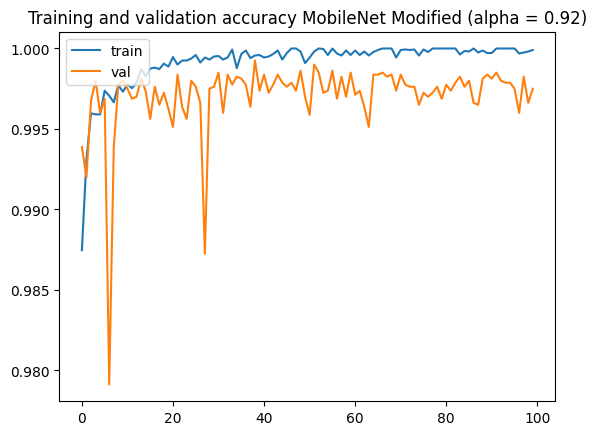

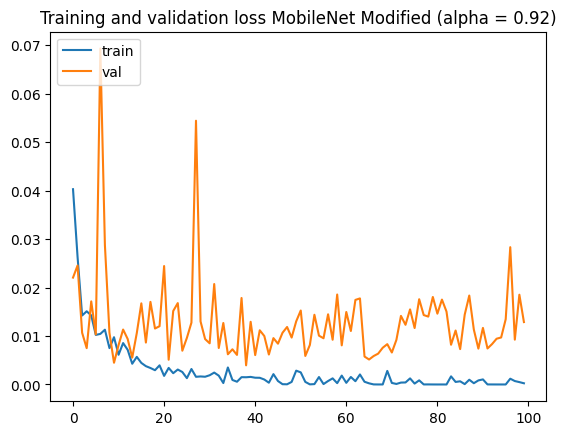

In [10]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Modified092.history['accuracy']
val_acc  = history_Modified092.history['val_accuracy']
loss     = history_Modified092.history['loss']
val_loss = history_Modified092.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha = 0.92)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha = 0.92)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.91)

In [11]:
# Modified model alpha = 0.91
MobileNet_Modified091 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.91)

In [12]:
# Compile the model
MobileNet_Modified091.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Check the model summary
MobileNet_Modified091.summary()

Model: "mobilenet_0.91_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 29)      783       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 29)      116       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 29)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 29)      261       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 29

In [14]:
# Train the model
history_modified091 = MobileNet_Modified091.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 49s 41ms/step - loss: 0.0398 - accuracy: 0.9878 - val_loss: 0.0430 - val_accuracy: 0.9919
Epoch 2/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0208 - accuracy: 0.9942 - val_loss: 0.0269 - val_accuracy: 0.9960
Epoch 3/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0168 - accuracy: 0.9953 - val_loss: 0.0287 - val_accuracy: 0.9898
Epoch 4/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0160 - val_accuracy: 0.9952
Epoch 5/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0461 - val_accuracy: 0.9859
Epoch 6/100
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0070 - val_accuracy: 0.9976
Epoch 7/100
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0

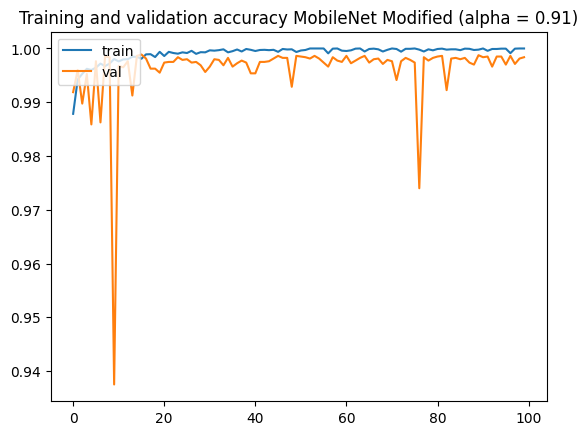

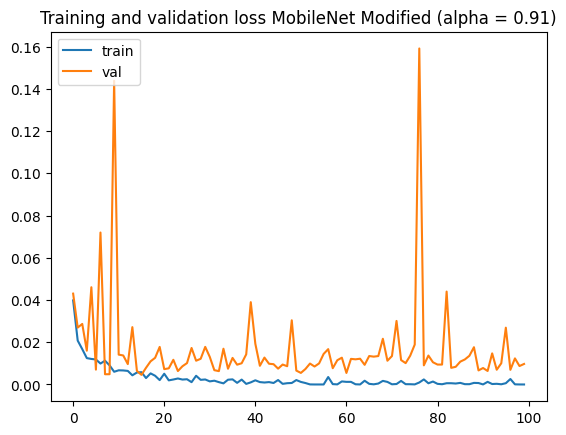

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified091.history['accuracy']
val_acc  = history_modified091.history['val_accuracy']
loss     = history_modified091.history['loss']
val_loss = history_modified091.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha = 0.91)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha = 0.91)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.89)

In [16]:
# Modified model alpha = 0.89
MobileNet_Modified089 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.89)

In [17]:
# Compile the model
MobileNet_Modified089.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Check the model summary
MobileNet_Modified089.summary()

Model: "mobilenet_0.89_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 28)      756       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 28)      112       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 28)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 28)      252       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 28

In [19]:
# Train the model
history_modified089 = MobileNet_Modified089.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 47s 39ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0412 - val_accuracy: 0.9891
Epoch 2/100
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0187 - accuracy: 0.9948 - val_loss: 0.0104 - val_accuracy: 0.9979
Epoch 3/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0181 - val_accuracy: 0.9956
Epoch 4/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.1216 - val_accuracy: 0.9704
Epoch 5/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0175 - val_accuracy: 0.9980
Epoch 6/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0098 - val_accuracy: 0.9976
Epoch 7/100
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0

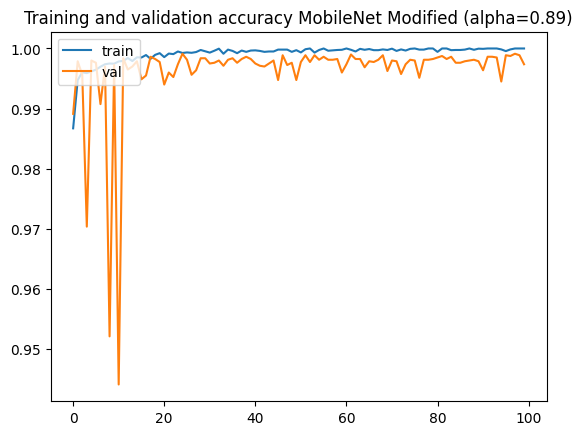

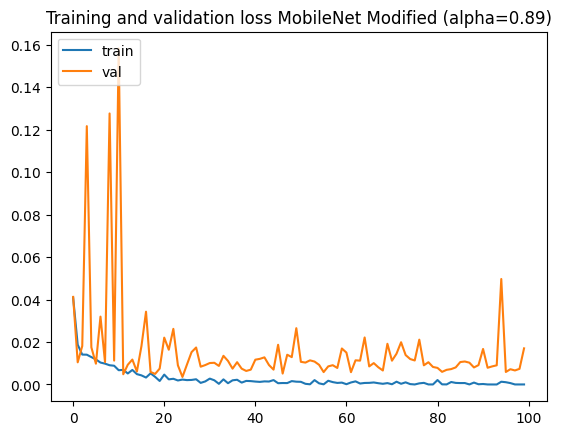

In [20]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified089.history['accuracy']
val_acc  = history_modified089.history['val_accuracy']
loss     = history_modified089.history['loss']
val_loss = history_modified089.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.89)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.89)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.88)

In [21]:
# Modified model alpha = 0.88
MobileNet_Modified088 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.88)

In [22]:
# Compile the model
MobileNet_Modified088.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Check the model summary
MobileNet_Modified088.summary()

Model: "mobilenet_0.88_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 28)      756       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 28)      112       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 28)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 28)      252       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 28

In [24]:
# Train the model
history_modified088 = MobileNet_Modified088.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 46s 38ms/step - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.0192 - val_accuracy: 0.9933
Epoch 2/100
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0198 - accuracy: 0.9945 - val_loss: 0.0116 - val_accuracy: 0.9969
Epoch 3/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.0117 - val_accuracy: 0.9967
Epoch 4/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0078 - val_accuracy: 0.9980
Epoch 5/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0134 - val_accuracy: 0.9960
Epoch 6/100
1000/1000 [==============================] - 37s 37ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0094 - val_accuracy: 0.9974
Epoch 7/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0109 - accuracy: 0.9973 - val_loss: 0

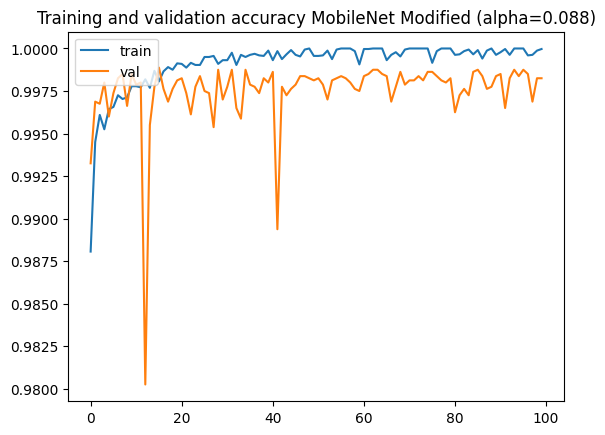

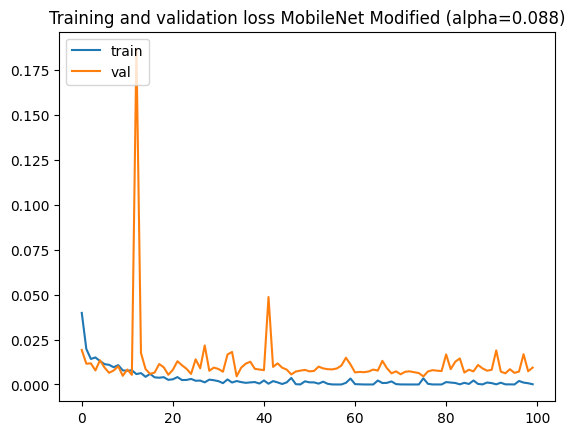

In [25]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified088.history['accuracy']
val_acc  = history_modified088.history['val_accuracy']
loss     = history_modified088.history['loss']
val_loss = history_modified088.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.088)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.088)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.87)

In [26]:
# Modified model alpha = 0.87
MobileNet_Modified087 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.87)

In [27]:
# Compile the model
MobileNet_Modified087.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Check the model summary
MobileNet_Modified087.summary()

Model: "mobilenet_0.87_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 27)      729       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 27)      108       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 27)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 27)      243       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 27

In [29]:
# Train the model
history_modified087 = MobileNet_Modified087.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 47s 39ms/step - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.9965 - val_accuracy: 0.6184
Epoch 2/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0221 - val_accuracy: 0.9921
Epoch 3/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0527 - val_accuracy: 0.9811
Epoch 4/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.1548 - val_accuracy: 0.9768
Epoch 5/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.2209 - val_accuracy: 0.8909
Epoch 6/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.0127 - val_accuracy: 0.9952
Epoch 7/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0

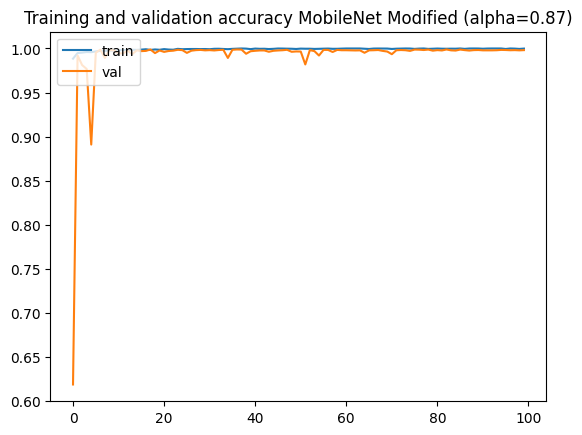

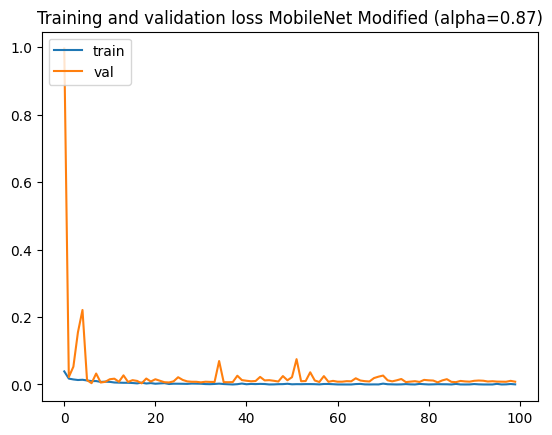

In [30]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified087.history['accuracy']
val_acc  = history_modified087.history['val_accuracy']
loss     = history_modified087.history['loss']
val_loss = history_modified087.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.87)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.87)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.86)

In [31]:
# Modified model alpha = 0.86
MobileNet_Modified086 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.86)

In [32]:
# Compile the model
MobileNet_Modified086.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Check the model summary
MobileNet_Modified086.summary()

Model: "mobilenet_0.86_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 27)      729       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 27)      108       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 27)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 27)      243       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 27

In [34]:
# Train the model
history_modified086 = MobileNet_Modified086.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 45s 38ms/step - loss: 0.0425 - accuracy: 0.9863 - val_loss: 0.0961 - val_accuracy: 0.9678
Epoch 2/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0273 - val_accuracy: 0.9925
Epoch 3/100
1000/1000 [==============================] - 37s 37ms/step - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.0236 - val_accuracy: 0.9966
Epoch 4/100
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0071 - val_accuracy: 0.9976
Epoch 5/100
1000/1000 [==============================] - 37s 37ms/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.0060 - val_accuracy: 0.9975
Epoch 6/100
1000/1000 [==============================] - 38s 38ms/step - loss: 0.0158 - accuracy: 0.9960 - val_loss: 0.0071 - val_accuracy: 0.9984
Epoch 7/100
1000/1000 [==============================] - 37s 37ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0

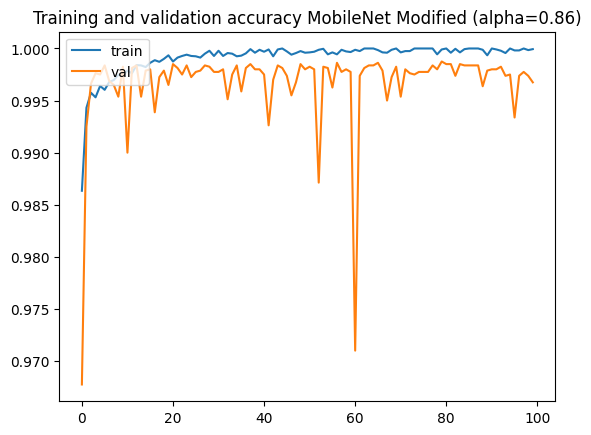

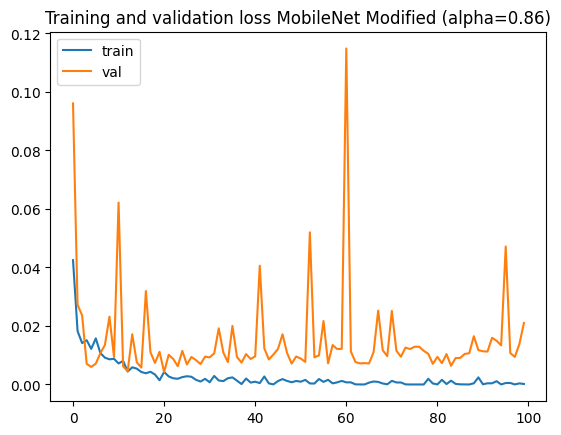

In [35]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified086.history['accuracy']
val_acc  = history_modified086.history['val_accuracy']
loss     = history_modified086.history['loss']
val_loss = history_modified086.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.86)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.86)')
plt.legend(['train', 'val'], loc='upper left')

# Save All Model

In [36]:
# Save all the model
MobileNet_Modified092.save('MobileNet_Modified092.h5')
MobileNet_Modified091.save('MobileNet_Modified091.h5')
MobileNet_Modified089.save('MobileNet_Modified089.h5')
MobileNet_Modified088.save('MobileNet_Modified088.h5')
MobileNet_Modified087.save('MobileNet_Modified087.h5')
MobileNet_Modified086.save('MobileNet_Modified086.h5')